<a href="https://colab.research.google.com/github/IvanNardini/Tensorflow-in-practice/blob/master/2_cv_nn_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello CV

In [0]:
import numpy as np
np.set_printoptions(linewidth=200)
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
((train_img, train_lb,), (test_img, test_lb)) = fashion_mnist.load_data()

In [11]:
len(train_img)

60000

In [12]:
len(test_img)

10000

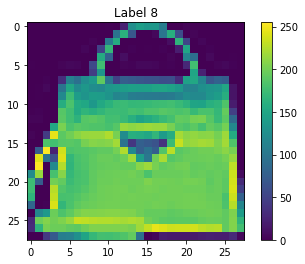

In [13]:
# # Plot sample image
sample = np.random.randint(1,1000)
sample
image = train_img[sample]
# plot the sample
plt.title('Label {label}'.format(label=train_lb[sample]))
plt.imshow(image)
plt.colorbar()
plt.show()

In [14]:
print('Label {label}'.format(label=train_lb[sample]))
print(train_img[sample])

Label 8
[[  0   0   0   0   0   0   0   0   0   0   1   0  23 126 143 135 135 107   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  97 163  69   0   0   5 100 160  60   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0 106 157   0   0   0   0   0   0   9 166  53   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0  51 170   0   0   2   0   1   0   2   0  20 151   0   0   2   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 157  80   0   9   0   0   0   0   0   3   0 117  92   0   6   0   0   1   0]
 [  1   0   0   0   3   5   4   0  56 177   0   0   3   2   5   5   4   1   2   0  28 178   0   0   3   5   2   0]
 [  0   0   0   0   0   0   0   0  46 133   0   0   0   0   0   0   0   0   0   0   0 150  24   0   0   0   0   0]
 [  0   0   2   0  33 111  94 124 137 192  99  50  75  71  67  64  63  60  61  32 146 153 115  68  80  74   0   0]
 [  0   1   5   0  98 152 124 135 125 122 134 138 142 145 144 145 149 15

# Data Preprocessing

In [0]:
pp_train_img = train_img/255.0
pp_test_img = test_img/255.0

## Comment

Why? (Have to check)

# Model Training

## One hidden layer - 128 neurons (baseline)

In [0]:
#Define Model Architecture

model = keras.Sequential([
    # flat the square pixel image matrix in an array (28*28=784 neurons)
    keras.layers.Flatten(input_shape = (28,28)),
    # Hidden layer (number of neurons random)
    keras.layers.Dense(128, activation=tf.nn.relu),
    # output layer (10 neurons as problem classes)
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

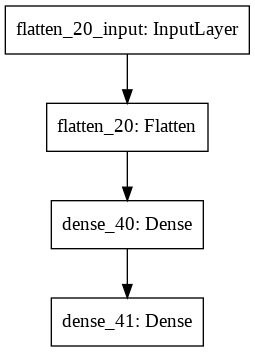

In [85]:
from keras.utils import plot_model
plot_model(model)

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [87]:
model.fit(pp_train_img, train_lb, epochs=6)

Epoch 1/6
60000/60000 [==============================] - 5s 79us/step - loss: 0.4979 - accuracy: 0.1044
Epoch 2/6
60000/60000 [==============================] - 5s 77us/step - loss: 0.3731 - accuracy: 0.1035
Epoch 3/6
60000/60000 [==============================] - 5s 81us/step - loss: 0.3351 - accuracy: 0.1023
Epoch 4/6
60000/60000 [==============================] - 5s 83us/step - loss: 0.3120 - accuracy: 0.1024
Epoch 5/6
60000/60000 [==============================] - 5s 81us/step - loss: 0.2950 - accuracy: 0.1021
Epoch 6/6
60000/60000 [==============================] - 5s 79us/step - loss: 0.2795 - accuracy: 0.1028


In [79]:
test_loss, test_acc = model.evaluate(pp_test_img,  test_lb, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.11379999667406082


In [0]:
model.save('model_1_128.h5')

## One hidden layer - 256 neurons

In [0]:
def fitter(train_img, train_lb, neurons, epochs=5):
  model = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dense(neurons, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  model.fit(train_img, train_lb, epochs=epochs)
  return model


In [57]:
model = fitter(pp_train_img, train_lb, 256, 6)

Epoch 1/6
60000/60000 [==============================] - 7s 115us/step - loss: 1.6864 - accuracy: 0.1208
Epoch 2/6
60000/60000 [==============================] - 7s 112us/step - loss: 1.6206 - accuracy: 0.1133
Epoch 3/6
60000/60000 [==============================] - 7s 112us/step - loss: 1.6089 - accuracy: 0.1154
Epoch 4/6
60000/60000 [==============================] - 7s 113us/step - loss: 1.6012 - accuracy: 0.1134
Epoch 5/6
60000/60000 [==============================] - 7s 111us/step - loss: 1.5958 - accuracy: 0.1145
Epoch 6/6
60000/60000 [==============================] - 7s 113us/step - loss: 1.5911 - accuracy: 0.1129


In [58]:
test_loss, test_acc = model.evaluate(pp_test_img,  test_lb, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.10890000313520432


### Comment

More Neurons means more calculations. 
Slower training process, but in this case we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns.

In [0]:
model.save('model_1_256.h5')

If we had more epochs...

In [59]:
model = fitter(pp_train_img, train_lb, 256, 12)

Epoch 1/12
60000/60000 [==============================] - 7s 115us/step - loss: 1.7587 - accuracy: 0.1140
Epoch 2/12
60000/60000 [==============================] - 7s 113us/step - loss: 1.6758 - accuracy: 0.1096
Epoch 3/12
60000/60000 [==============================] - 7s 112us/step - loss: 1.6651 - accuracy: 0.1057
Epoch 4/12
60000/60000 [==============================] - 7s 112us/step - loss: 1.6592 - accuracy: 0.1065
Epoch 5/12
60000/60000 [==============================] - 7s 120us/step - loss: 1.6537 - accuracy: 0.1053
Epoch 6/12
60000/60000 [==============================] - 7s 116us/step - loss: 1.6513 - accuracy: 0.1062
Epoch 7/12
60000/60000 [==============================] - 7s 113us/step - loss: 1.6477 - accuracy: 0.1041
Epoch 8/12
60000/60000 [==============================] - 7s 114us/step - loss: 1.6462 - accuracy: 0.1051
Epoch 9/12
60000/60000 [==============================] - 7s 113us/step - loss: 1.6056 - accuracy: 0.1045
Epoch 10/12
60000/60000 [=====================

In [60]:
test_loss, test_acc = model.evaluate(pp_test_img,  test_lb, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.09440000355243683


In [61]:
model = fitter(pp_train_img, train_lb, 256, 24)

Epoch 1/24
60000/60000 [==============================] - 7s 114us/step - loss: 1.6752 - accuracy: 0.1203
Epoch 2/24
60000/60000 [==============================] - 7s 113us/step - loss: 1.6222 - accuracy: 0.1142
Epoch 3/24
60000/60000 [==============================] - 7s 114us/step - loss: 1.6086 - accuracy: 0.1159
Epoch 4/24
60000/60000 [==============================] - 7s 115us/step - loss: 1.6008 - accuracy: 0.1134
Epoch 5/24
60000/60000 [==============================] - 7s 114us/step - loss: 1.5944 - accuracy: 0.1110
Epoch 6/24
60000/60000 [==============================] - 7s 115us/step - loss: 1.5909 - accuracy: 0.1116
Epoch 7/24
60000/60000 [==============================] - 7s 114us/step - loss: 1.5892 - accuracy: 0.1115
Epoch 8/24
60000/60000 [==============================] - 7s 114us/step - loss: 1.5839 - accuracy: 0.1077
Epoch 9/24
60000/60000 [==============================] - 7s 112us/step - loss: 1.5805 - accuracy: 0.1080
Epoch 10/24
60000/60000 [=====================

The loss value stops decreasing around 20 and 21 (and sometimes it could increase). This is a side effect of something called 'overfitting'

## Two hidden layers 

In [0]:
def fitter(train_img, train_lb, neurons_1, neurons_2, epochs=5):
  model = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dense(neurons_1, activation=tf.nn.relu),
  keras.layers.Dense(neurons_2, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  model.fit(train_img, train_lb, epochs=epochs)
  return model

In [89]:
model = fitter(pp_train_img, train_lb, 256, 128, 10)

Epoch 1/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.4779 - accuracy: 0.1045
Epoch 2/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.3565 - accuracy: 0.1027
Epoch 3/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.3228 - accuracy: 0.1032
Epoch 4/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.3005 - accuracy: 0.1037
Epoch 5/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2839 - accuracy: 0.1034
Epoch 6/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.2684 - accuracy: 0.1033
Epoch 7/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2578 - accuracy: 0.1039
Epoch 8/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.2457 - accuracy: 0.1028
Epoch 9/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.2364 - accuracy: 0.1023
Epoch 10/10
60000/60000 [=====================

In [90]:
test_loss, test_acc = model.evaluate(pp_test_img,  test_lb, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.09149999916553497


In [0]:
model.save('model_2_256_128.h5')

### Comment

It looks like if the problem is simple, you don't need a great brain (easy to solve, small set of layers)

# Training improvements

## Callbacks

Would it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<1.6):
      print("\nReached xx% accuracy so cancelling training!")
      self.model.stop_training = True
callback = myCallback()

In [0]:
def fitter(train_img, train_lb, neurons, callback):
  model = keras.Sequential([
  keras.layers.Flatten(input_shape = (28,28)),
  keras.layers.Dense(neurons, activation=tf.nn.relu),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  model.fit(train_img, train_lb, epochs=5, callbacks=[callback])
  return model


In [94]:
model = fitter(pp_train_img, train_lb, 128, callback)

Epoch 1/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.5028 - accuracy: 0.1032

Reached xx% accuracy so cancelling training!
